# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import sklearn
import os
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
columns_remove_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"
                      ,"DiabetesPedigreeFunction"]

In [4]:
for column in columns_remove_zero:
    df[column] = df[column].replace(0, np.NaN)
    column_mean = int (df[column].mean(skipna = True))
    df[column] = df[column].replace(np.NaN, column_mean)

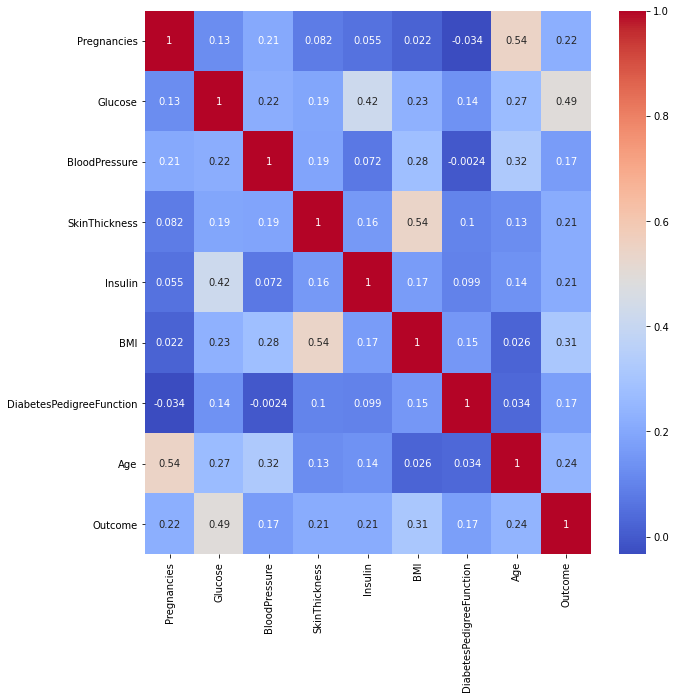

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, annot_kws={'size':10}, cmap='coolwarm')

In [9]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0, test_size = 0.2)
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)

32


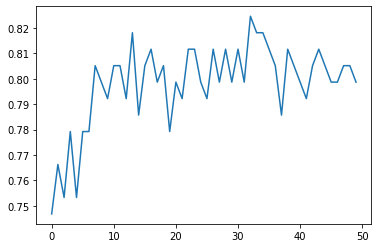

In [10]:
acc = []
for k in range(1, 51):
    knnModel = KNeighborsClassifier(n_neighbors=k, p = 2, metric = 'euclidean')
    knnModel.fit(x_train, y_train)
    y_pred = knnModel.predict(x_test)
    acc.append(accuracy_score(y_test, y_pred))
max_value = np.argmax(acc)    
print(max_value)    
plt.plot(acc)


In [11]:
knnModel = KNeighborsClassifier(n_neighbors=32, p = 2, metric = 'euclidean')
knnModel.fit(x_train, y_train)
y_pred_knnModel = knnModel.predict(x_test)

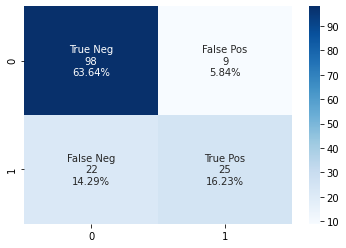

In [12]:
confMatrix = confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                confMatrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     confMatrix.flatten()/np.sum(confMatrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(confMatrix, annot=labels, fmt = '', cmap='Blues')

In [13]:
print(f1_score(y_test, y_pred_knnModel))
print(accuracy_score(y_test, y_pred_knnModel))

0.617283950617284
0.7987012987012987


In [14]:
logModel= LogisticRegression(solver='liblinear')
logModel.fit(x_train,y_train)
y_pred_logModel = logModel.predict(x_test)

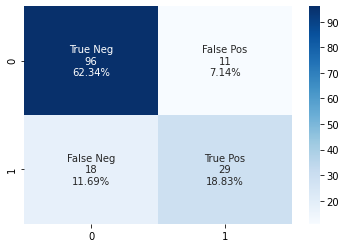

In [15]:
confMatrix = confusion_matrix(y_test, y_pred_logModel)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                confMatrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confMatrix.flatten()/np.sum(confMatrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confMatrix, annot=labels, fmt = '', cmap='Blues')

In [16]:
print(f1_score(y_test, y_pred_logModel))
print(accuracy_score(y_test, y_pred_logModel))

0.6666666666666666
0.8116883116883117
